This notebook estimates the zero points of the Subaru observations based on comparison with the SDSS overlapping stars. The Subaru and SDSS catalogs are matched using TopCat spatial matching.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from scipy.stats import linregress

In [4]:
# read in the matched catalog
cat = pandas.read_csv('/sandbox/Subaru/zwcl2120/zwcl2120_SDSSstars_match_Subaru.csv')

# Zero points based on differeincing
## G

In [17]:
g_sdss_min = 18
g_sdss_max = 21
g_sub_min = -15
g_sub_max = 0

mask_g = np.logical_and(np.logical_and(cat['g'] > g_sdss_min, cat['g'] < g_sdss_max),
                        np.logical_and(cat['MAG_AUTO_g'] > g_sub_min, cat['MAG_AUTO_g'] < g_sub_max))

In [18]:
mean_dif_g = np.mean(np.array(cat['g'][mask_g])-np.array(cat['MAG_AUTO_g'][mask_g]))
median_dif_g = np.median(np.array(cat['g'][mask_g])-np.array(cat['MAG_AUTO_g'][mask_g]))
print 'g zero point based on median = {0:0.3f}'.format(median_dif_g)
print 'g zero point based on mean = {0:0.3f}'.format(mean_dif_g)

g zero point based on median = 27.227
g zero point based on mean = 27.243


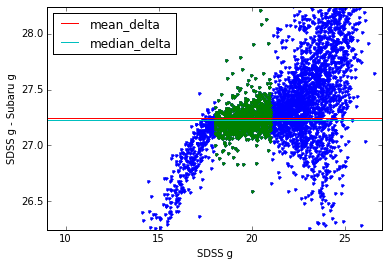

In [19]:
fig = plt.figure()
plt.plot(cat['g'],cat['g']-cat['MAG_AUTO_g'],'.')
plt.plot(cat['g'][mask_g],cat['g'][mask_g]-cat['MAG_AUTO_g'][mask_g],'.')
x_lim = plt.xlim((9,27))
plt.plot(x_lim,(mean_dif_g,mean_dif_g),label='mean_delta')
plt.plot(x_lim,(median_dif_g,median_dif_g),label='median_delta')
plt.ylim((mean_dif_g-1,mean_dif_g+1))
plt.xlabel('SDSS g')
plt.ylabel('SDSS g - Subaru g')
plt.legend(loc=0)

## r

In [24]:
r_sdss_min = 17
r_sdss_max = 21
r_sub_min = -15
r_sub_max = 0

mask_r = np.logical_and(np.logical_and(cat['r'] > r_sdss_min, cat['r'] < r_sdss_max),
                        np.logical_and(cat['MAG_AUTO_r'] > r_sub_min, cat['MAG_AUTO_r'] < r_sub_max))

mean_dif_r = np.mean(np.array(cat['r'][mask_r])-np.array(cat['MAG_AUTO_r'][mask_r]))
median_dif_r = np.median(np.array(cat['r'][mask_r])-np.array(cat['MAG_AUTO_r'][mask_r]))
print 'r zero point based on median = {0:0.3f}'.format(median_dif_r)
print 'r zero point based on mean = {0:0.3f}'.format(mean_dif_r)

r zero point based on median = 27.488
r zero point based on mean = 27.522


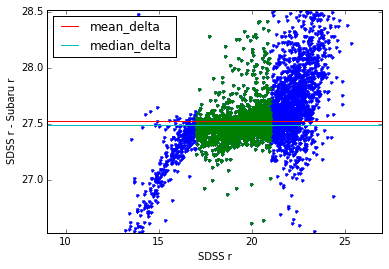

In [25]:
fig = plt.figure()
plt.plot(cat['r'],cat['r']-cat['MAG_AUTO_r'],'.')
plt.plot(cat['r'][mask_r],cat['r'][mask_r]-cat['MAG_AUTO_r'][mask_r],'.')
x_lim = plt.xlim((9,27))
plt.plot(x_lim,(mean_dif_r,mean_dif_r),label='mean_delta')
plt.plot(x_lim,(median_dif_r,median_dif_r),label='median_delta')
plt.ylim((mean_dif_r-1,mean_dif_r+1))
plt.xlabel('SDSS r')
plt.ylabel('SDSS r - Subaru r')
plt.legend(loc=0)

## Summary
Use the median zero point estimates rather than the regression estimates since it should be more robust and is a more direct measure.

In [26]:
print 'Results:'
print '---------'
print 'band    ZP'
print '----  ------'
print 'g     {0:0.3f}'.format(median_dif_g)
print 'r     {0:0.3f}'.format(median_dif_r)

Results:
---------
band    ZP
----  ------
g     27.227
r     27.488


Note that these zero points are close to what Chris got for his observations a few months earlier:

Results

Band | dmm | ZP
-----|-----|-----
 g   |0.008|27.358
 r   |0.005|27.685
 i   |0.008|27.555